[View in Colaboratory](https://colab.research.google.com/github/crazy-lazy-life/Kaggle_Pulsar_Star_Prediction/blob/master/pulsar_star_prediction.ipynb)

In [0]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras import optimizers

In [0]:
data = pd.read_csv("pulsar_stars.csv")

In [5]:
data.head()
list(data.columns.values)

[' Mean of the integrated profile',
 ' Standard deviation of the integrated profile',
 ' Excess kurtosis of the integrated profile',
 ' Skewness of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Standard deviation of the DM-SNR curve',
 ' Excess kurtosis of the DM-SNR curve',
 ' Skewness of the DM-SNR curve',
 'target_class']

In [6]:
columns = " Mean of the integrated profile, Standard deviation of the integrated profile, Excess kurtosis of the integrated profile, Skewness of the integrated profile, Mean of the DM-SNR curve, Standard deviation of the DM-SNR curve, Excess kurtosis of the DM-SNR curve, Skewness of the DM-SNR curve,target_class".split(',')
print(columns)

[' Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve', ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve', 'target_class']


In [7]:
df = pd.DataFrame(data, columns = columns)
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [0]:
feature_name=[' Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve', ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve']
x = data[feature_name]
y = data["target_class"]

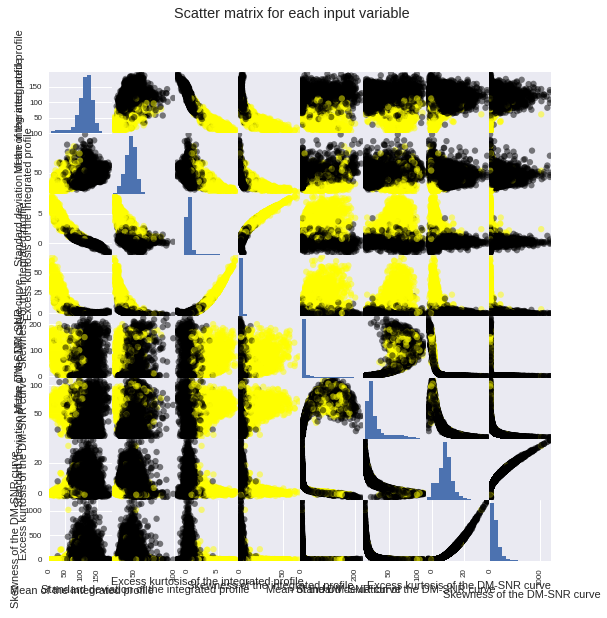

In [9]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(x, c=y, marker='o', s=40, hist_kwds = {'bins': 15}, figsize=(9,9), cmap=cmap)

plt.suptitle("Scatter matrix for each input variable")
plt.show()

In [10]:
print(y.unique())

[0 1]


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)

In [12]:
print(y_train.shape)
print(y_test.shape)

(10738,)
(7160,)


In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
model = tf.keras.models.Sequential()
layer1 = tf.keras.layers.Dense(128, input_shape = [8])
model.add(layer1)
layer2 = tf.keras.layers.Dense(64)
model.add(layer2)
layer3 = tf.keras.layers.Dense(20)
model.add(layer3)
layer4 = tf.keras.layers.Dense(16)
model.add(tf.keras.layers.Dense(2, activation="softmax"))

In [0]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 20)                1300      
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 42        
Total params: 10,750
Trainable params: 10,750
Non-trainable params: 0
_________________________________________________________________


In [29]:
trained_model = model.fit(x_train, y_train, epochs = 250)

Epoch 1/250
10738/10738 [==============================] - 1s 56us/step - loss: 0.0725 - acc: 0.9270
Epoch 2/250
10738/10738 [==============================] - 0s 36us/step - loss: 0.0608 - acc: 0.9387
Epoch 3/250
10738/10738 [==============================] - 0s 36us/step - loss: 0.0446 - acc: 0.9553
Epoch 4/250
10738/10738 [==============================] - 0s 35us/step - loss: 0.0441 - acc: 0.9556
Epoch 5/250
10738/10738 [==============================] - 0s 35us/step - loss: 0.0430 - acc: 0.9568
Epoch 6/250
10738/10738 [==============================] - 0s 36us/step - loss: 0.0362 - acc: 0.9638
Epoch 7/250
10738/10738 [==============================] - 0s 36us/step - loss: 0.0370 - acc: 0.9628
Epoch 8/250
10738/10738 [==============================] - 0s 36us/step - loss: 0.0344 - acc: 0.9654
Epoch 9/250
10738/10738 [==============================] - 0s 35us/step - loss: 0.0366 - acc: 0.9632
Epoch 10/250
10738/10738 [==============================] - 0s 35us/step - loss: 0.0296 - a

In [30]:
score = model.evaluate(x_test, y_test)

7160/7160 [==============================] - 0s 23us/step


In [31]:
print("Model score: ", score)

Model score:  [0.025837988830977977, 0.974162011106587]


In [32]:
print(trained_model.history.keys())

dict_keys(['loss', 'acc'])


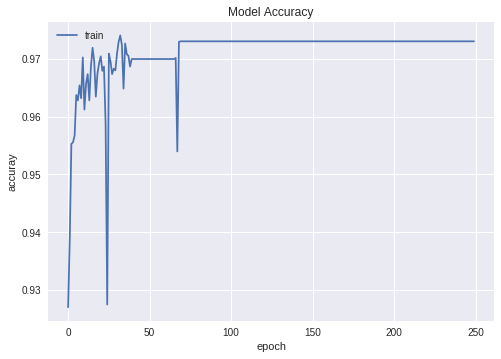

In [33]:
plt.plot(trained_model.history['acc'])
plt.title("Model Accuracy")
plt.ylabel('accuray')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()